In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 选取前4列
data = pd.read_csv("iris.csv").iloc[:,:-1]
# 选取最后的标签
Y_label = pd.read_csv("iris.csv").iloc[:,-1]


In [2]:
# 对数据进行降维
# pca = PCA(n_components=2)
# pca.fit(data)
# data = pca.transform(data)

In [4]:
from collections import Counter
class EM:
    def __init__(self,num = 1):
        """
        初始点选取的个数为 num个
        """
        self.num = num
        self.center = None #每个样本中心点
        self.counts = None #字典类型,每一个类型的数量
        self.totss = None #total sum of squares.
        self.totwithinss = None #Total within-cluster sum of squares,越小越好
        self.totbetweens = None #between-cluster sum of squares
        self.__R = 1 #初始值,表示组内平方和在总平方和占比
        pass
    def __update_index(self,X,v):
        """
        计算 X 到 v 的 距离矩阵
        """
        INDEX = np.zeros(X.shape[0])
        # 组内方差
        s = 0.0
        for i in range(X.shape[0]):
            dist = [np.linalg.norm(X[i,:] - v[j,:]) for j in range(v.shape[0])]
            INDEX[i] = np.argmin(dist)
            s += np.min(dist)
        return (INDEX,s)
    
    def __cacl_toldist(self,dist):
        """
        计算样本的总距离
        """
        mu = np.mean(dist,axis=0)
        s = [np.linalg.norm(dist[i,:] - mu) for i in range(dist.shape[0])]
        return np.sum(s)
        
    
    def __plot_dist(self,X,v):
        """
        绘制 图像默认前两列数据
        """
        X = np.array(X)
        x = X[:,0]
        y = X[:,1]
        plt.scatter(x,y,alpha=0.5)
        for i in range(v.shape[0]):
            plt.scatter(v[i,0],v[i,1],marker= "x",s=200)
        plt.show()
    
        
    def fit(self,X:np.array,k:int,iters = 5,Plot = True):
        """
        X表示待训练的样本,np.array型
        k是聚类个数
        iters表示迭代次数
        """
        assert k > 1
        
        self.totss = self.__cacl_toldist(X)
        
        data  = pd.DataFrame(X)
        
        # 给出若干个初始点
        vlist = []
        IndexList = []
        totwithinssList = []
        
        for ss in range(self.num):
            ## 生成k个中心
            INDEX = np.random.choice([i for i in range(k)],data.shape[0],replace = True)

            data["Label"] = INDEX
            v = data.groupby("Label").mean().values
            ## 计算每一个点到四个中心的距离
            if Plot is True:
                    self.__plot_dist(X,v)

            for s in range(iters):
                # 更新标签  E步
                INDEX,totwithinss = self.__update_index(X,v)
                ## 判断是否终止迭代
                if self.__R - totwithinss/self.totss < 1e-5:
                    break
                else:
                    self.__R = totwithinss/self.totss
                    #print("第{: d}次模拟组内方差占比 {:.6f}".format(s,self.__R))
                data["Label"] = INDEX
                # M步
                v = data.groupby("Label").mean().values
                # 画图,可以选择
                if Plot is True:
                    self.__plot_dist(X,v)
            vlist.append(v)
            IndexList.append(INDEX)
            totwithinssList.append(totwithinss)
            self.__R = 1
                
        # 挑选一个最好的模型,依据是 最小的 totwithinss
        pos = np.argmin(totwithinssList)
        
        self.y_pre = IndexList[pos]
        self.center = vlist[pos]
        self.counts = Counter(self.y_pre)
        self.totwithinss = totwithinssList[pos]
        self.totbetweens = self.totss - self.totwithinss
        pass
        
     

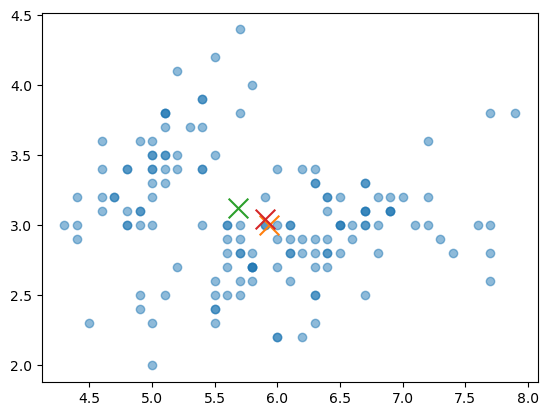

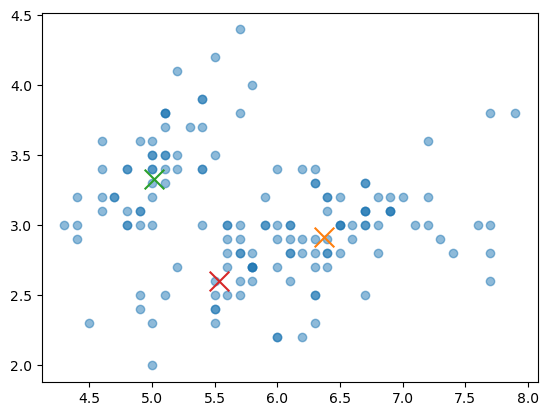

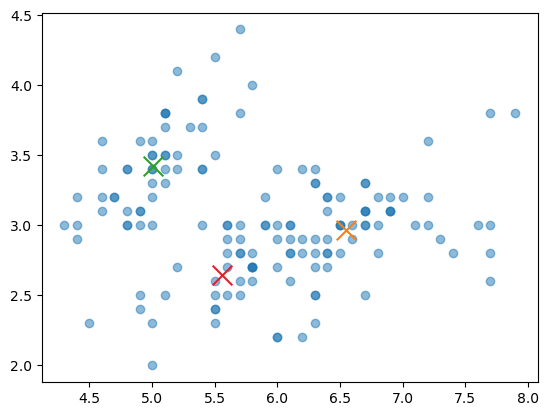

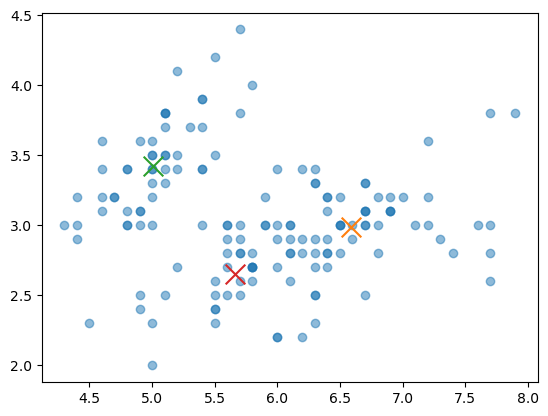

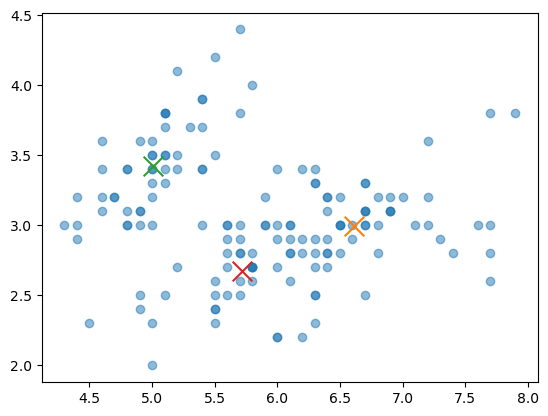

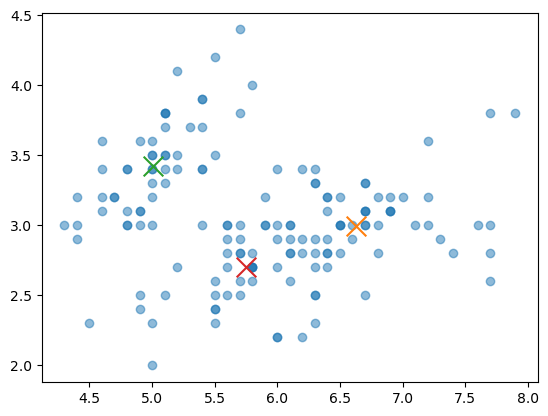

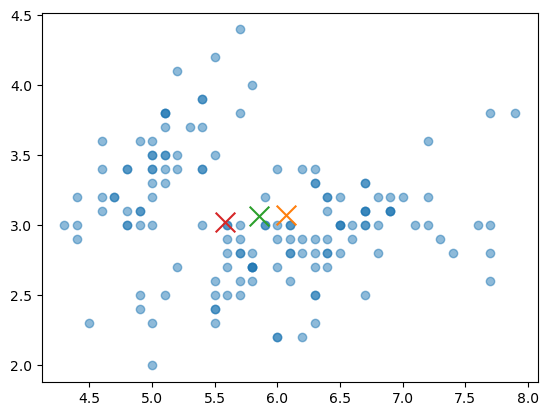

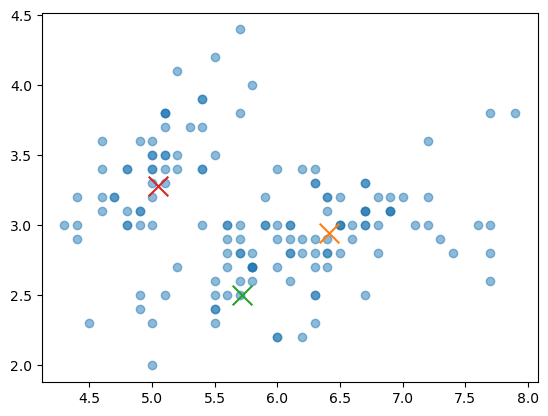

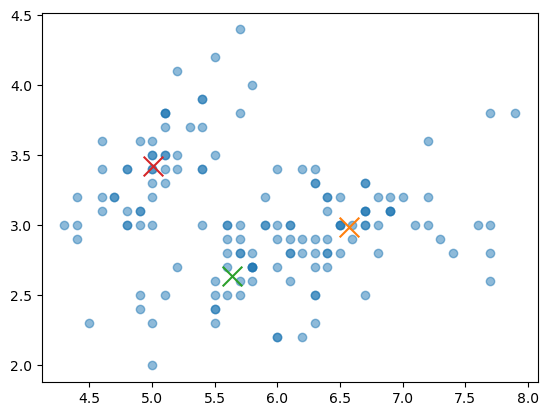

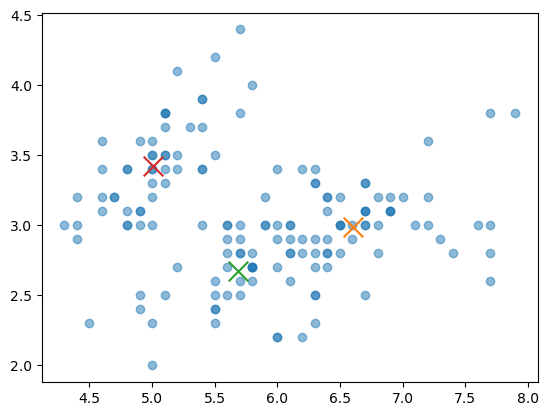

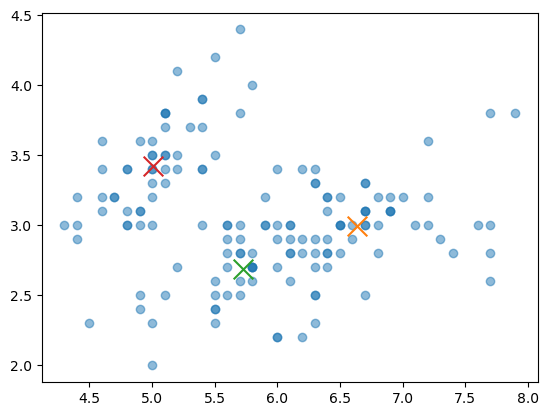

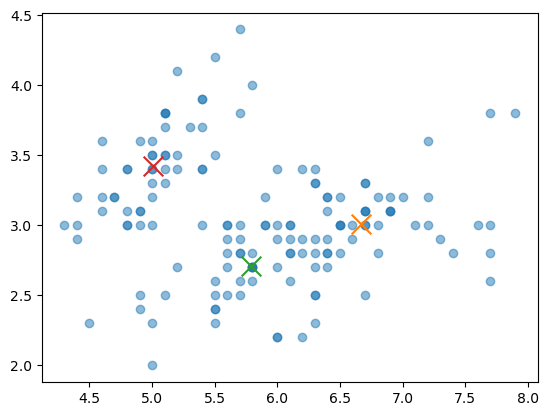

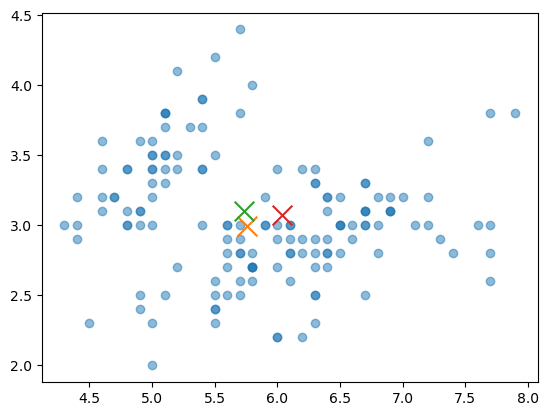

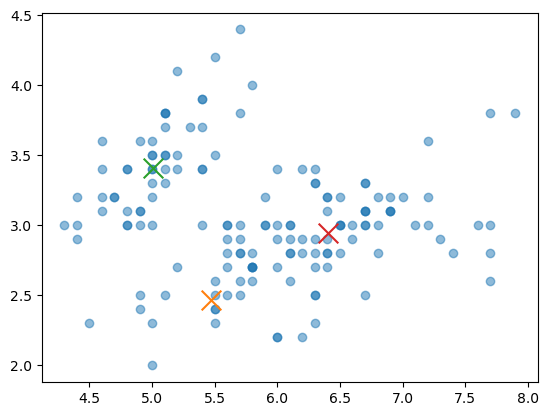

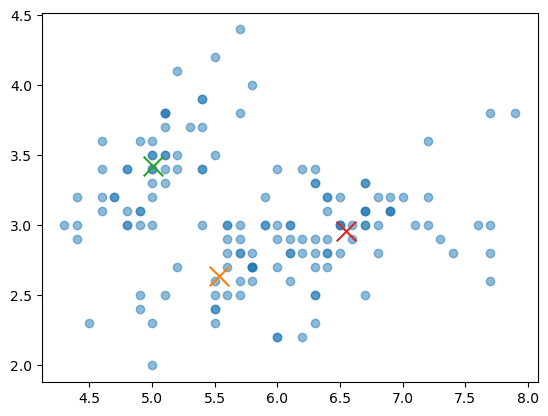

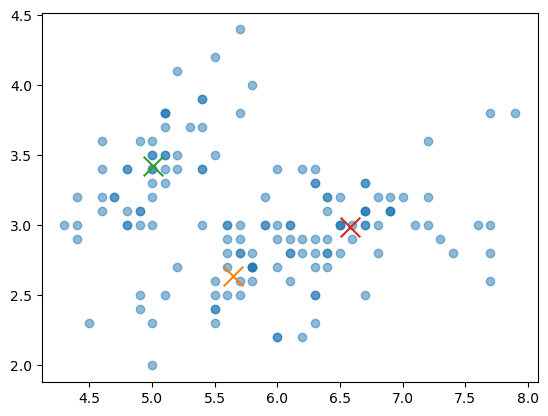

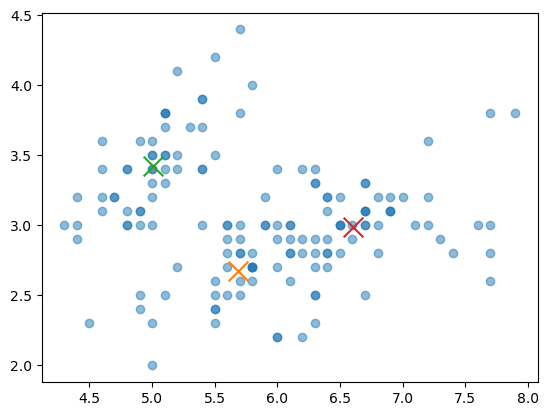

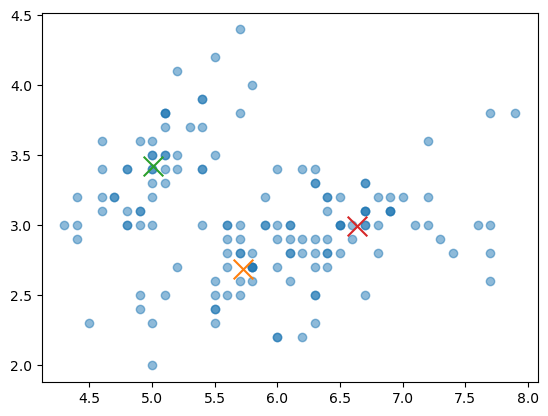

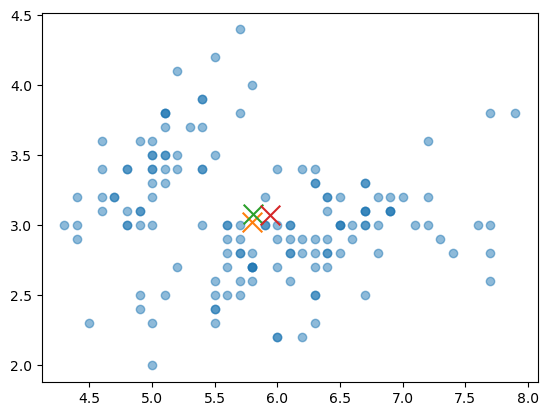

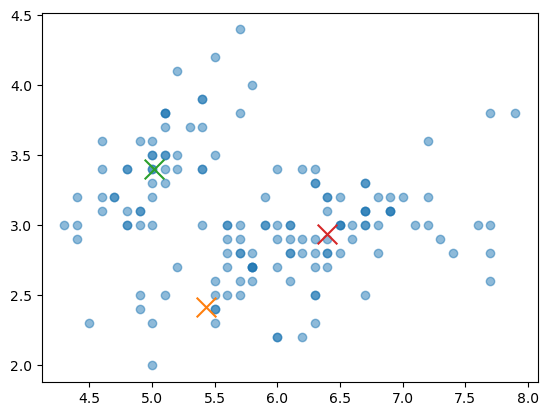

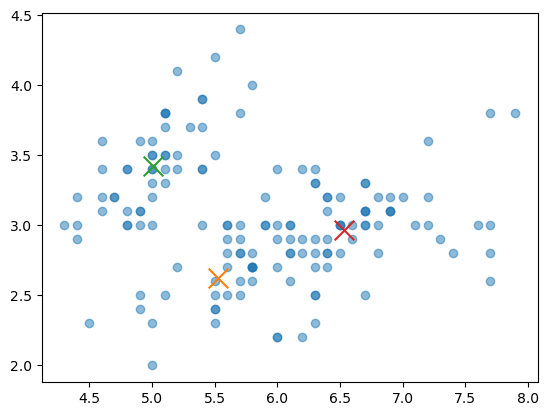

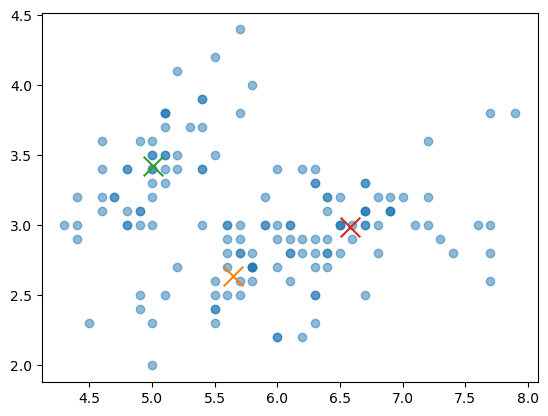

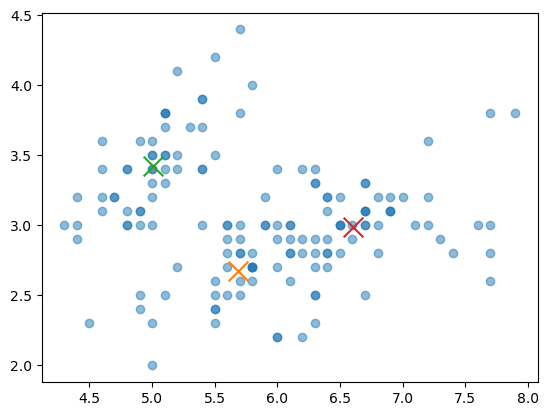

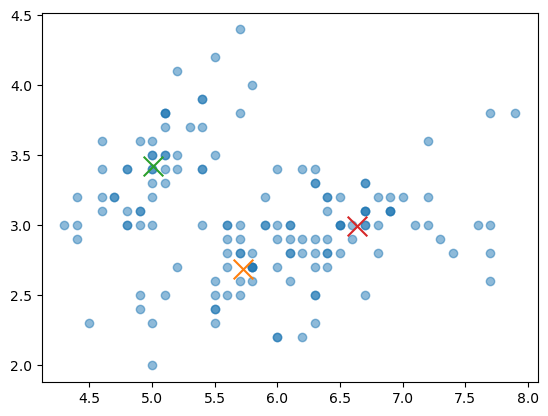

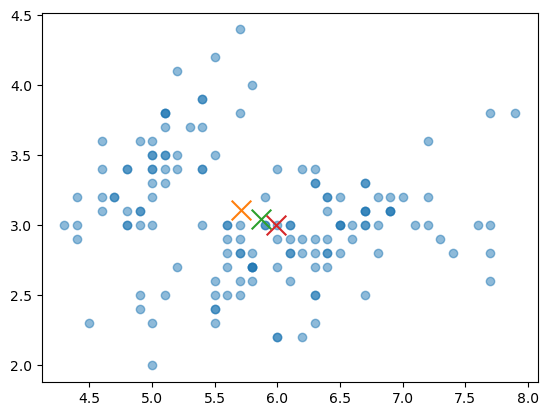

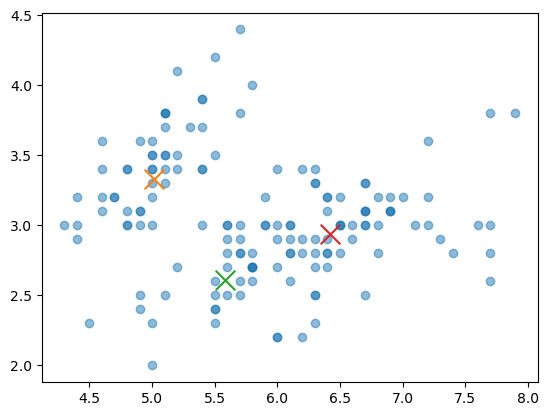

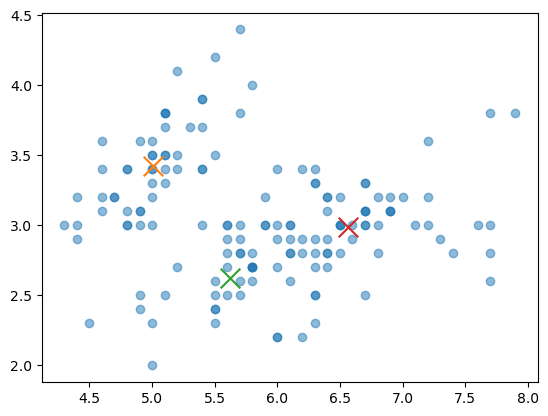

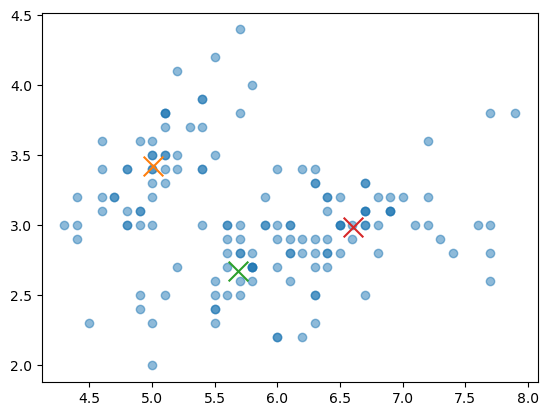

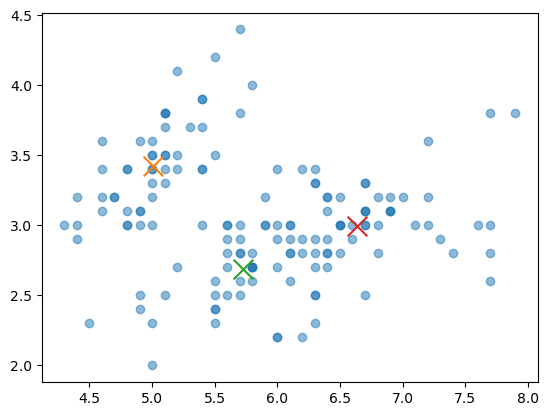

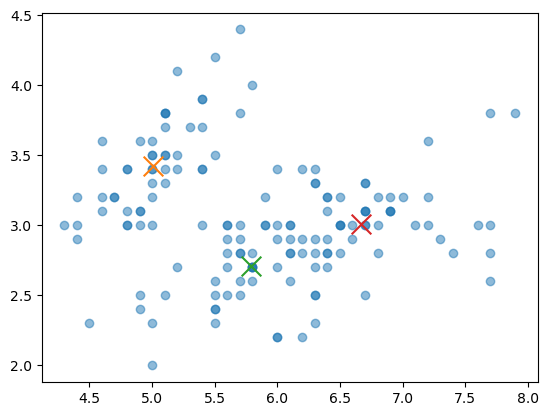

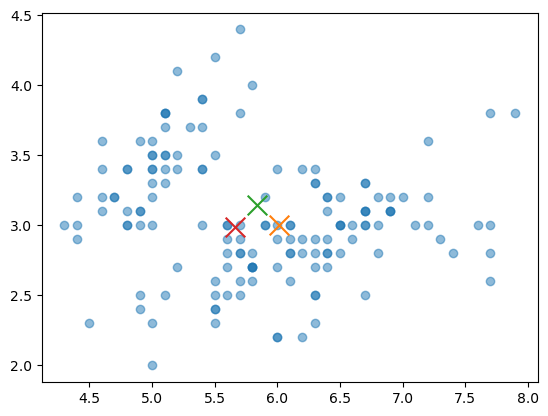

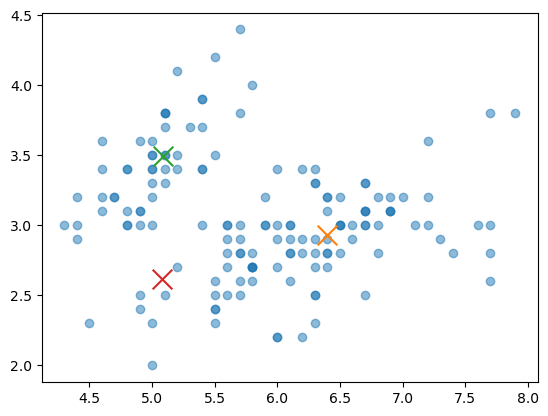

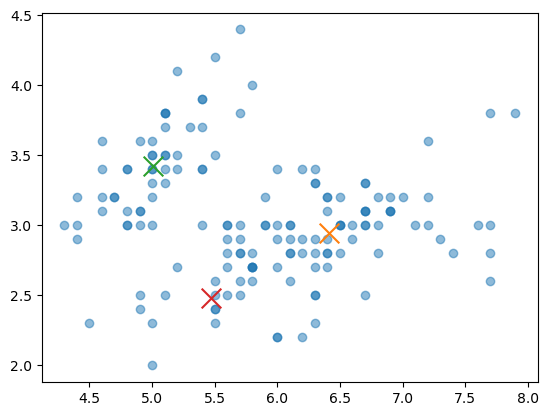

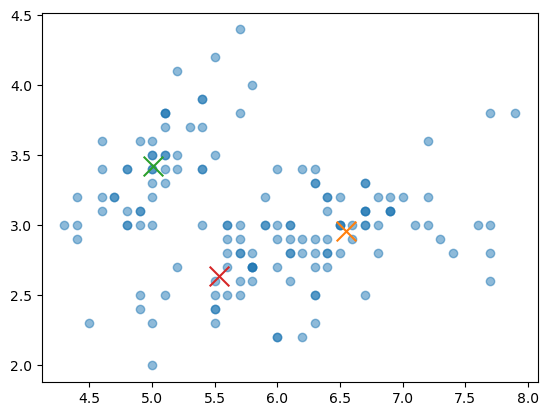

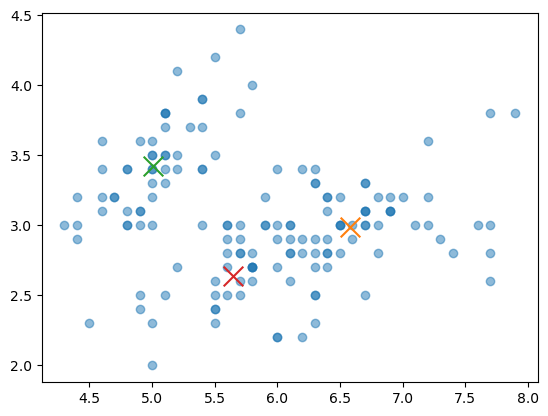

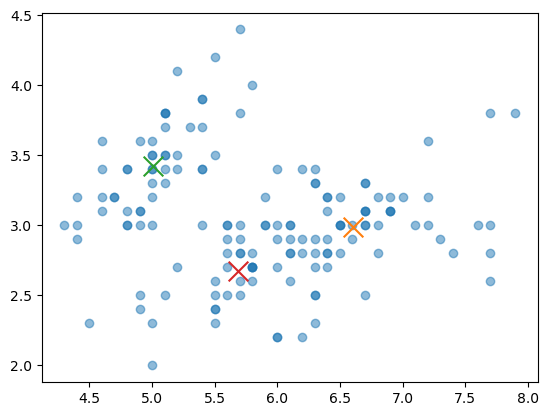

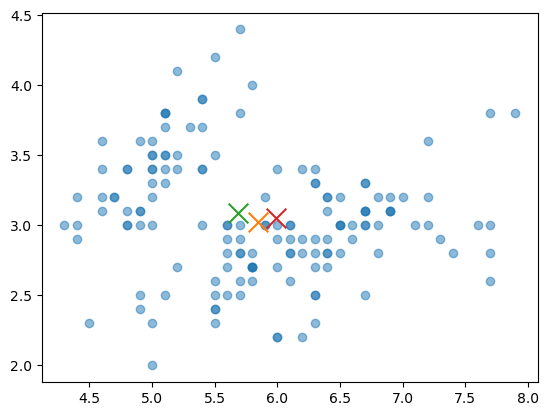

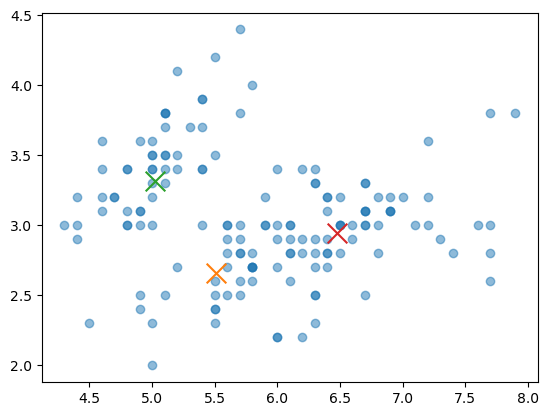

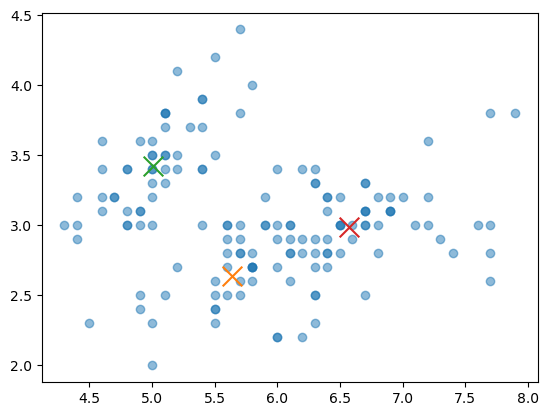

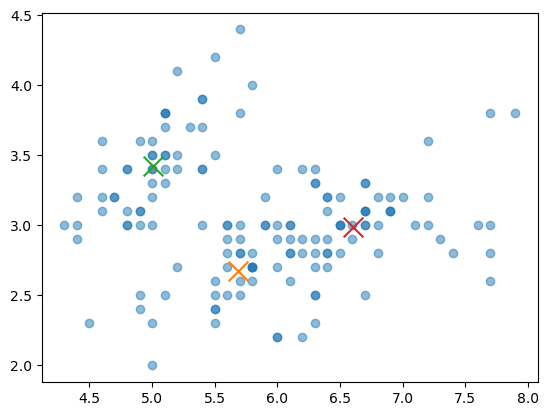

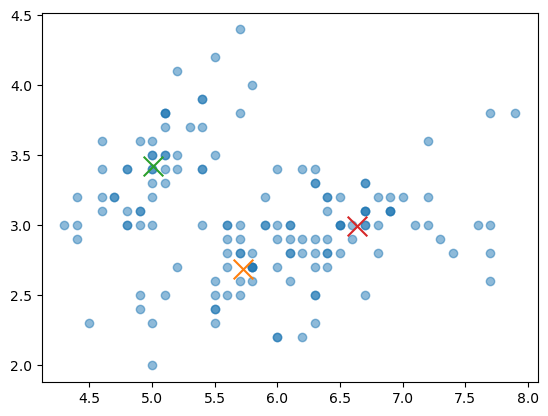

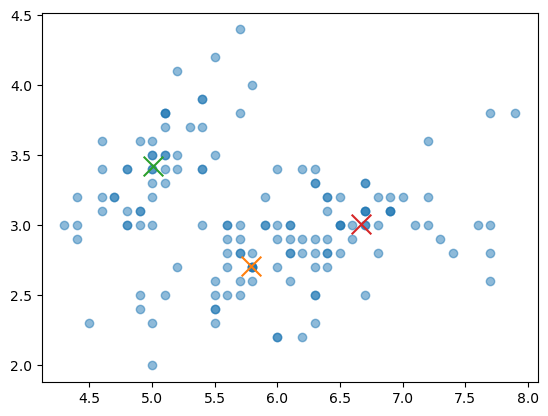

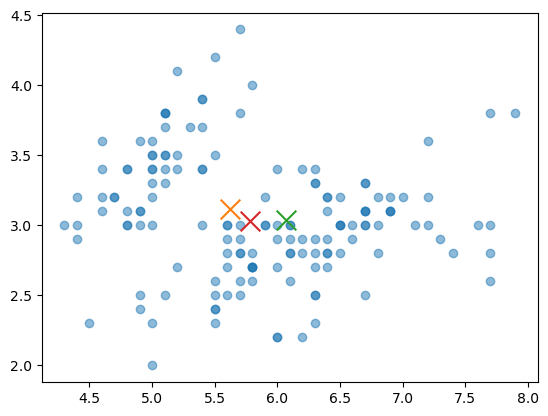

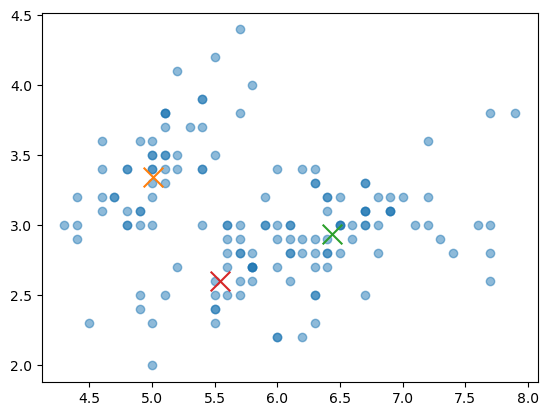

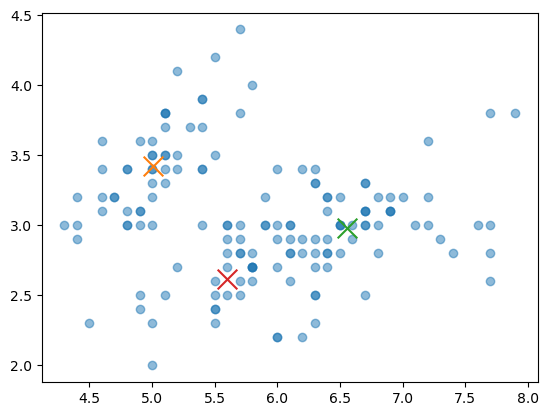

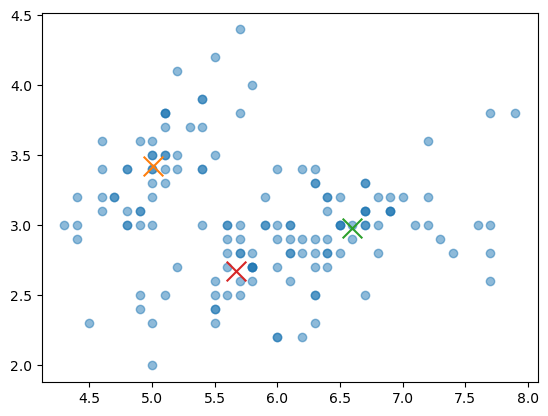

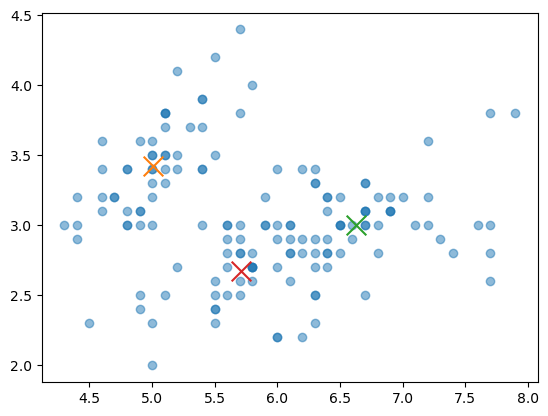

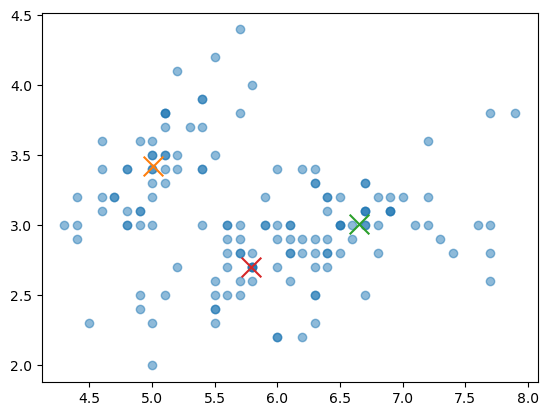

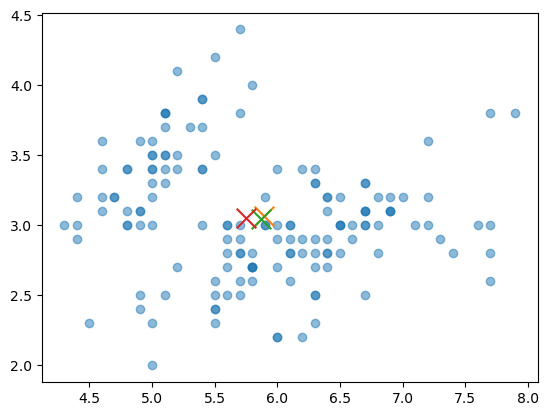

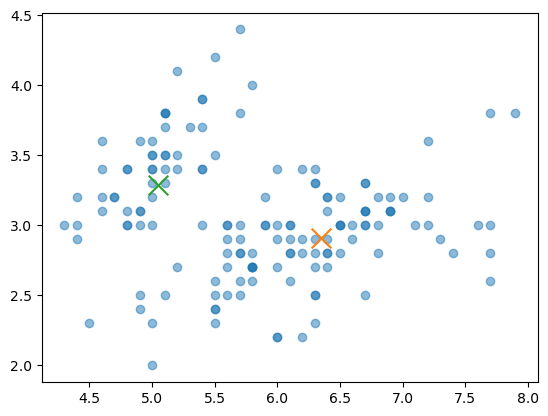

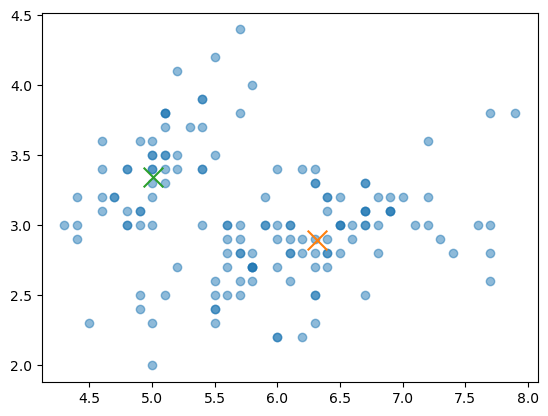

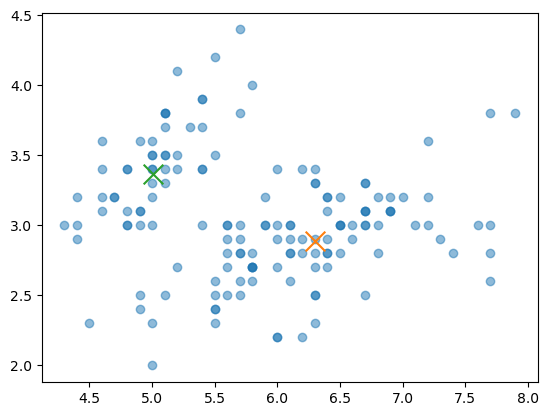

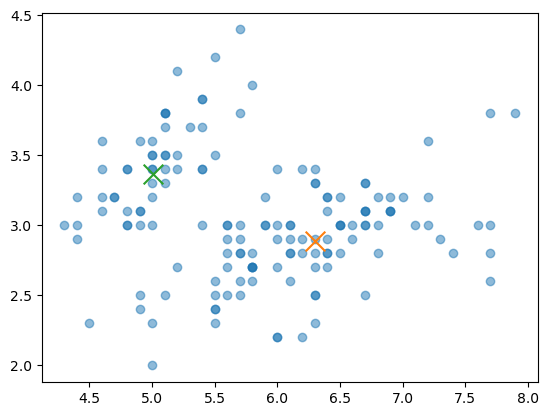

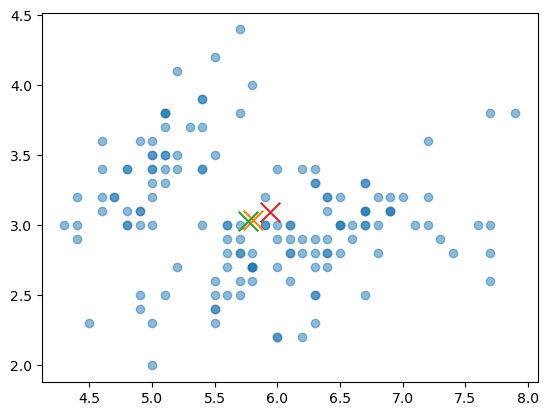

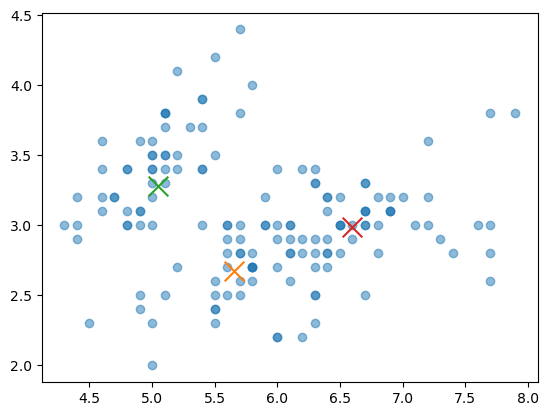

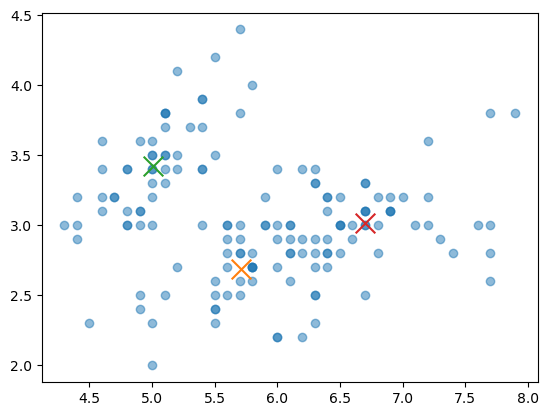

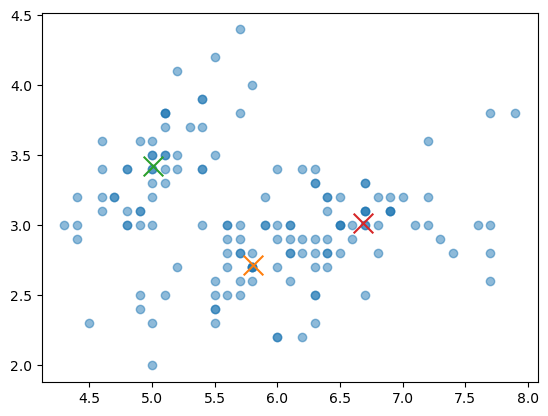

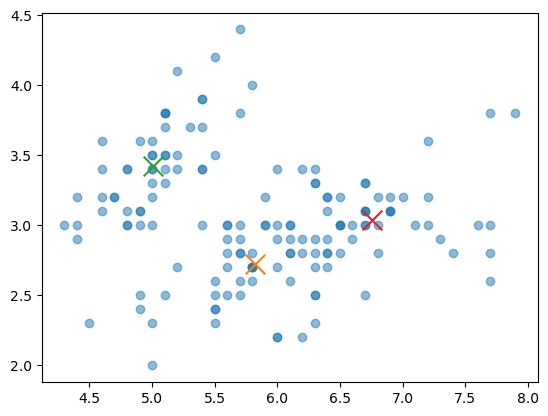

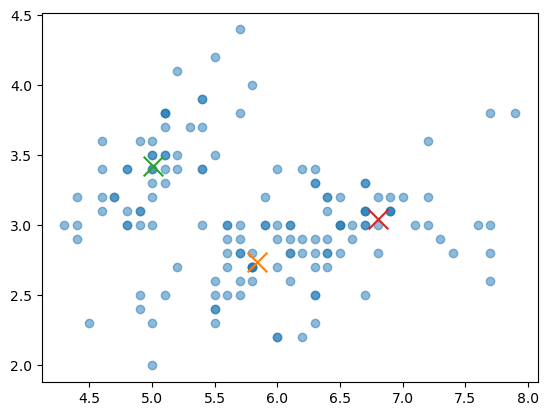

Counter({0.0: 56, 1.0: 50, 2.0: 44})
[[5.83928571 2.73571429 4.33928571 1.40714286]
 [5.006      3.428      1.462      0.246     ]
 [6.8        3.04545455 5.62727273 2.01818182]]


In [6]:
%matplotlib inline
em  = EM(num=10)
em.fit(np.array(data),3,iters= 5,Plot=True)
print(em.counts)
print(em.center)

In [6]:
print(em.totss)

286.4344032482236


In [7]:
em.y_pre

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
em.totwithinss/em.totss

0.3333763535687775